In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.utils import shuffle
from keras.optimizers import RMSprop

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_recall_curve
from sklearn.metrics import recall_score, classification_report, auc, roc_curve,confusion_matrix,accuracy_score, auc

from sklearn.metrics import precision_recall_fscore_support, f1_score
from sklearn.preprocessing import StandardScaler

from pylab import rcParams
from keras.models import Model, load_model
from keras.layers import Input, Dense
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras import regularizers
from tensorflow import keras
from keras import Sequential
from keras.layers import Flatten, Dense, Dropout, BatchNormalization
from keras.layers import Conv1D, MaxPool1D
from keras.optimizers import Adam
from sklearn.metrics import confusion_matrix,accuracy_score, roc_curve, auc
from imblearn.over_sampling import SVMSMOTE
from sklearn.model_selection import StratifiedKFold

Using TensorFlow backend.
F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.ensemble.bagging module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)
F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.ensemble.base module is  deprecated in version 0.22 and will be removed in version 0.24

In [2]:
import os


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import preprocessing, metrics
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from keras import backend as K
from keras.models import Model
from keras.layers import Input, Dense, Lambda, BatchNormalization
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras import regularizers
from sklearn.utils import shuffle



In [3]:
# Read the dataset
df = pd.read_csv('F:creditcard.csv')
#check on the size of the dataframe

test_split = 0.1 #portion of data used for testing
 #portion of training data used for validation
    
# We separate the feature vector from the classification result
X = df.drop('Class',axis=1).values
y = df['Class'].values

In [4]:
# Feature scaling
X -= X.min(axis=0)
X /= X.max(axis=0)

In [5]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Fold #1
Before OverSampling, counts of label '1': 492
Before OverSampling, counts of label '0': 284315 



F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
F:\Anaconda\lib\site-packages\sk

After OverSampling, the shape of train_X: (454904, 30)
After OverSampling, the shape of train_y: (454904,) 

After OverSampling, counts of label '1': 227452
After OverSampling, counts of label '0': 227452
Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 30)           0                                            
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 27)           837         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 27)           108         dense_1[0][0]                    
_____________________________________________________________________________________

454904/454904 [==============================] - 24s 54us/step - loss: 17.9243 - rec_loss: 29.1257 - kl_loss: 4.7544 - val_loss: 14.5581 - val_rec_loss: 25.4789 - val_kl_loss: 2.7496
Epoch 17/150
454904/454904 [==============================] - 24s 54us/step - loss: 17.8395 - rec_loss: 29.0001 - kl_loss: 4.7566 - val_loss: 14.2202 - val_rec_loss: 24.8919 - val_kl_loss: 2.6796
Epoch 18/150
454904/454904 [==============================] - 25s 54us/step - loss: 17.6922 - rec_loss: 28.7460 - kl_loss: 4.7607 - val_loss: 14.4830 - val_rec_loss: 25.3187 - val_kl_loss: 2.8167
Epoch 19/150
454904/454904 [==============================] - 25s 54us/step - loss: 17.6988 - rec_loss: 28.7757 - kl_loss: 4.7610 - val_loss: 14.5182 - val_rec_loss: 25.2948 - val_kl_loss: 2.9153
Epoch 20/150
454904/454904 [==============================] - 25s 54us/step - loss: 17.6305 - rec_loss: 28.6771 - kl_loss: 4.7614 - val_loss: 14.3331 - val_rec_loss: 24.9710 - val_kl_loss: 2.8984
Epoch 21/150
454904/454904 [=====

Epoch 75/150
454904/454904 [==============================] - 27s 59us/step - loss: 16.2274 - rec_loss: 26.1262 - kl_loss: 4.8878 - val_loss: 13.6541 - val_rec_loss: 23.8966 - val_kl_loss: 2.7651
Epoch 76/150
454904/454904 [==============================] - 26s 58us/step - loss: 16.3725 - rec_loss: 26.4054 - kl_loss: 4.8924 - val_loss: 13.5571 - val_rec_loss: 23.4886 - val_kl_loss: 2.9651
Epoch 77/150
454904/454904 [==============================] - 27s 58us/step - loss: 16.2122 - rec_loss: 26.0900 - kl_loss: 4.8909 - val_loss: 13.6754 - val_rec_loss: 23.9894 - val_kl_loss: 2.7152
Epoch 78/150
454904/454904 [==============================] - 27s 58us/step - loss: 16.1000 - rec_loss: 25.8784 - kl_loss: 4.8880 - val_loss: 13.3196 - val_rec_loss: 23.1406 - val_kl_loss: 2.8520
Epoch 79/150
454904/454904 [==============================] - 26s 58us/step - loss: 16.1142 - rec_loss: 25.9038 - kl_loss: 4.8860 - val_loss: 13.4652 - val_rec_loss: 23.3715 - val_kl_loss: 2.9031
Epoch 80/150
454904/

Epoch 117/150
454904/454904 [==============================] - 27s 58us/step - loss: 15.9153 - rec_loss: 25.5177 - kl_loss: 4.9065 - val_loss: 13.4488 - val_rec_loss: 23.3558 - val_kl_loss: 2.8800
Epoch 118/150
454904/454904 [==============================] - 27s 58us/step - loss: 15.8803 - rec_loss: 25.4550 - kl_loss: 4.9051 - val_loss: 13.2998 - val_rec_loss: 23.0893 - val_kl_loss: 2.8523
Epoch 119/150
454904/454904 [==============================] - 27s 59us/step - loss: 15.8705 - rec_loss: 25.4356 - kl_loss: 4.9053 - val_loss: 13.3976 - val_rec_loss: 23.1897 - val_kl_loss: 2.9320
Epoch 120/150
454904/454904 [==============================] - 27s 58us/step - loss: 15.9140 - rec_loss: 25.5109 - kl_loss: 4.9097 - val_loss: 13.4319 - val_rec_loss: 23.1709 - val_kl_loss: 3.0255
Epoch 121/150
454904/454904 [==============================] - 26s 58us/step - loss: 15.8880 - rec_loss: 25.4698 - kl_loss: 4.9111 - val_loss: 13.5543 - val_rec_loss: 23.5184 - val_kl_loss: 2.9362
Epoch 122/150
4

454904/454904 [==============================] - 87s 192us/step - loss: 0.0391 - accuracy: 0.9880 - val_loss: 0.0433 - val_accuracy: 0.9868
Epoch 28/50
454904/454904 [==============================] - 87s 191us/step - loss: 0.0387 - accuracy: 0.9881 - val_loss: 0.0423 - val_accuracy: 0.9875
Epoch 29/50
454904/454904 [==============================] - 88s 194us/step - loss: 0.0387 - accuracy: 0.9881 - val_loss: 0.0426 - val_accuracy: 0.9869
Epoch 30/50
454904/454904 [==============================] - 87s 192us/step - loss: 0.0388 - accuracy: 0.9883 - val_loss: 0.0423 - val_accuracy: 0.9877
Epoch 31/50
454904/454904 [==============================] - 88s 193us/step - loss: 0.0391 - accuracy: 0.9881 - val_loss: 0.0442 - val_accuracy: 0.9868
Epoch 32/50
454904/454904 [==============================] - 88s 192us/step - loss: 0.0389 - accuracy: 0.9882 - val_loss: 0.0415 - val_accuracy: 0.9872
Epoch 33/50
454904/454904 [==============================] - 87s 192us/step - loss: 0.0388 - accurac

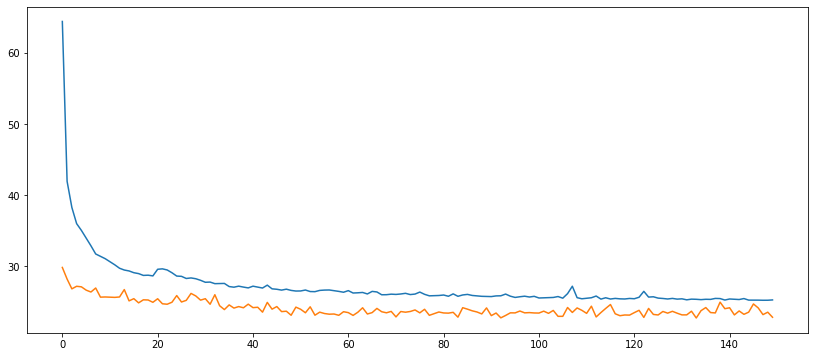

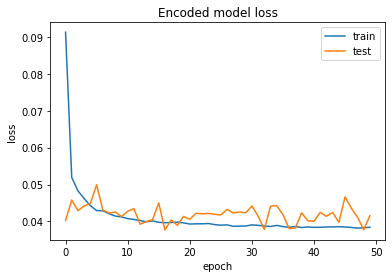

Overall accuracy of Convolutional Neural Network model: 0.9874302166356519


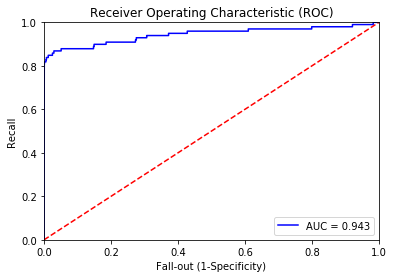

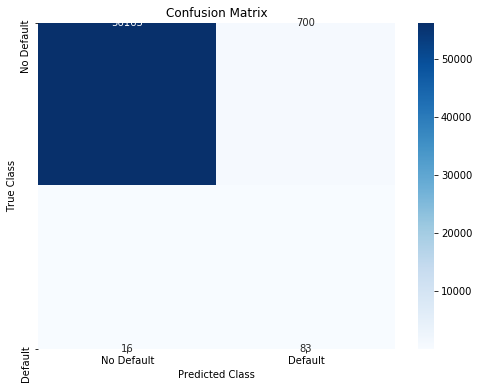

AUC(ROC): 0.9130367743701545
Precision: 0.10600255427841634
Recall: 0.8383838383838383
F1 score: 0.18820861678004536
False positives: 700
True positives: 83
False negatives: 16
True negatives: 56163
Fold #2
Before OverSampling, counts of label '1': 492
Before OverSampling, counts of label '0': 284315 



F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
F:\Anaconda\lib\site-packages\sk

After OverSampling, the shape of train_X: (454904, 30)
After OverSampling, the shape of train_y: (454904,) 

After OverSampling, counts of label '1': 227452
After OverSampling, counts of label '0': 227452
Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 30)           0                                            
__________________________________________________________________________________________________
dense_10 (Dense)                (None, 27)           837         input_3[0][0]                    
__________________________________________________________________________________________________
batch_normalization_12 (BatchNo (None, 27)           108         dense_10[0][0]                   
_____________________________________________________________________________________

454904/454904 [==============================] - 25s 56us/step - loss: 17.7521 - rec_loss: 28.7642 - kl_loss: 4.8510 - val_loss: 14.1268 - val_rec_loss: 24.5227 - val_kl_loss: 2.9444
Epoch 17/150
454904/454904 [==============================] - 25s 56us/step - loss: 17.6375 - rec_loss: 28.5839 - kl_loss: 4.8483 - val_loss: 14.0456 - val_rec_loss: 24.2385 - val_kl_loss: 3.0744
Epoch 18/150
454904/454904 [==============================] - 25s 55us/step - loss: 17.5851 - rec_loss: 28.5012 - kl_loss: 4.8537 - val_loss: 14.5622 - val_rec_loss: 25.3896 - val_kl_loss: 2.9986
Epoch 19/150
454904/454904 [==============================] - 25s 56us/step - loss: 17.5217 - rec_loss: 28.4342 - kl_loss: 4.8459 - val_loss: 13.7737 - val_rec_loss: 23.9197 - val_kl_loss: 2.9144
Epoch 20/150
454904/454904 [==============================] - 25s 56us/step - loss: 17.3394 - rec_loss: 28.0996 - kl_loss: 4.8513 - val_loss: 13.9784 - val_rec_loss: 24.2634 - val_kl_loss: 3.0085
Epoch 21/150
454904/454904 [=====

Epoch 58/150
454904/454904 [==============================] - 25s 55us/step - loss: 16.2756 - rec_loss: 26.0126 - kl_loss: 4.9637 - val_loss: 13.6442 - val_rec_loss: 23.5871 - val_kl_loss: 3.0395
Epoch 59/150
454904/454904 [==============================] - 25s 56us/step - loss: 16.2606 - rec_loss: 25.9724 - kl_loss: 4.9650 - val_loss: 13.3503 - val_rec_loss: 23.0638 - val_kl_loss: 2.9822
Epoch 60/150
454904/454904 [==============================] - 25s 56us/step - loss: 16.2460 - rec_loss: 25.9480 - kl_loss: 4.9722 - val_loss: 13.2781 - val_rec_loss: 22.9241 - val_kl_loss: 2.9755
Epoch 61/150
454904/454904 [==============================] - 25s 55us/step - loss: 16.2606 - rec_loss: 25.9762 - kl_loss: 4.9695 - val_loss: 13.4713 - val_rec_loss: 23.2357 - val_kl_loss: 3.0507
Epoch 62/150
454904/454904 [==============================] - 25s 56us/step - loss: 16.2020 - rec_loss: 25.8686 - kl_loss: 4.9656 - val_loss: 13.4617 - val_rec_loss: 23.1877 - val_kl_loss: 3.0720
Epoch 63/150
454904/

Epoch 100/150
454904/454904 [==============================] - 25s 56us/step - loss: 17.0175 - rec_loss: 27.5766 - kl_loss: 5.0011 - val_loss: 13.6974 - val_rec_loss: 23.6060 - val_kl_loss: 3.0936
Epoch 101/150
454904/454904 [==============================] - 26s 56us/step - loss: 17.6782 - rec_loss: 28.7746 - kl_loss: 5.0618 - val_loss: 13.8550 - val_rec_loss: 23.8150 - val_kl_loss: 3.1917
Epoch 102/150
454904/454904 [==============================] - 26s 56us/step - loss: 17.4091 - rec_loss: 28.2192 - kl_loss: 5.0582 - val_loss: 13.4600 - val_rec_loss: 23.2332 - val_kl_loss: 2.9862
Epoch 103/150
454904/454904 [==============================] - 25s 56us/step - loss: 16.1894 - rec_loss: 25.9369 - kl_loss: 4.9729 - val_loss: 13.3755 - val_rec_loss: 22.9232 - val_kl_loss: 3.1586
Epoch 104/150
454904/454904 [==============================] - 26s 56us/step - loss: 17.2023 - rec_loss: 27.8823 - kl_loss: 5.0348 - val_loss: 13.7023 - val_rec_loss: 23.5707 - val_kl_loss: 3.1766
Epoch 105/150
4

454904/454904 [==============================] - 26s 57us/step - loss: 15.9850 - rec_loss: 25.5741 - kl_loss: 4.9947 - val_loss: 13.5313 - val_rec_loss: 23.3081 - val_kl_loss: 3.1058
Epoch 142/150
454904/454904 [==============================] - 26s 57us/step - loss: 16.1855 - rec_loss: 25.9594 - kl_loss: 5.0073 - val_loss: 13.4769 - val_rec_loss: 23.2017 - val_kl_loss: 3.0826
Epoch 143/150
454904/454904 [==============================] - 26s 57us/step - loss: 16.5806 - rec_loss: 26.6536 - kl_loss: 5.0891 - val_loss: 13.5255 - val_rec_loss: 23.3449 - val_kl_loss: 3.0461
Epoch 144/150
454904/454904 [==============================] - 26s 57us/step - loss: 16.2717 - rec_loss: 26.0858 - kl_loss: 5.0613 - val_loss: 13.4459 - val_rec_loss: 23.2403 - val_kl_loss: 3.0117
Epoch 146/150
454904/454904 [==============================] - 26s 56us/step - loss: 16.1976 - rec_loss: 25.9660 - kl_loss: 5.0427 - val_loss: 13.4481 - val_rec_loss: 23.1695 - val_kl_loss: 3.0932
Epoch 147/150
454904/454904 [

454904/454904 [==============================] - 92s 202us/step - loss: 0.0423 - accuracy: 0.9837 - val_loss: 0.0384 - val_accuracy: 0.9812
Epoch 45/50
454904/454904 [==============================] - 92s 203us/step - loss: 0.0422 - accuracy: 0.9837 - val_loss: 0.0380 - val_accuracy: 0.9831
Epoch 46/50
454904/454904 [==============================] - 92s 201us/step - loss: 0.0423 - accuracy: 0.9836 - val_loss: 0.0394 - val_accuracy: 0.9799
Epoch 47/50
454904/454904 [==============================] - 91s 201us/step - loss: 0.0426 - accuracy: 0.9837 - val_loss: 0.0388 - val_accuracy: 0.9793
Epoch 48/50
454904/454904 [==============================] - 91s 201us/step - loss: 0.0424 - accuracy: 0.9836 - val_loss: 0.0379 - val_accuracy: 0.9827
Epoch 49/50
454904/454904 [==============================] - 91s 199us/step - loss: 0.0423 - accuracy: 0.9836 - val_loss: 0.0408 - val_accuracy: 0.9794
Epoch 50/50
454904/454904 [==============================] - 91s 199us/step - loss: 0.0422 - accurac

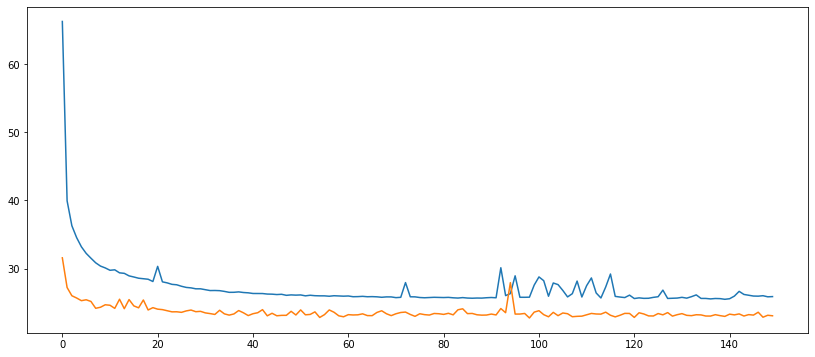

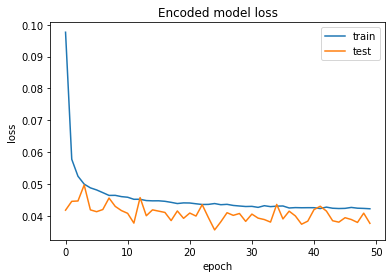

Overall accuracy of Convolutional Neural Network model: 0.9834802148800955


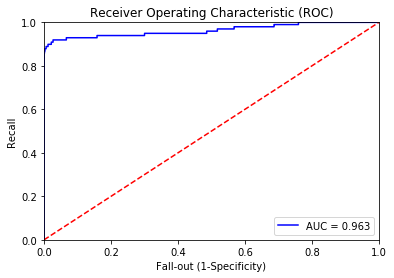

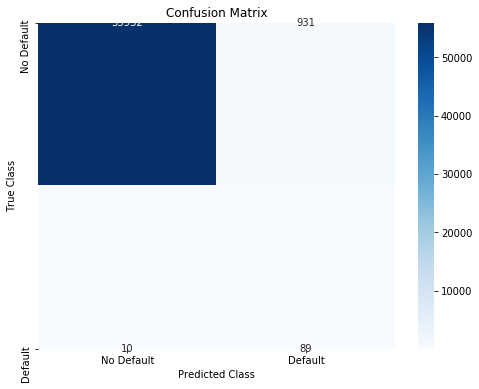

AUC(ROC): 0.9413086068820026
Precision: 0.08725490196078431
Recall: 0.898989898989899
F1 score: 0.1590705987488829
False positives: 931
True positives: 89
False negatives: 10
True negatives: 55932
Fold #3
Before OverSampling, counts of label '1': 492
Before OverSampling, counts of label '0': 284315 



F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
F:\Anaconda\lib\site-packages\sk

After OverSampling, the shape of train_X: (454904, 30)
After OverSampling, the shape of train_y: (454904,) 

After OverSampling, counts of label '1': 227452
After OverSampling, counts of label '0': 227452
Model: "model_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            (None, 30)           0                                            
__________________________________________________________________________________________________
dense_19 (Dense)                (None, 27)           837         input_5[0][0]                    
__________________________________________________________________________________________________
batch_normalization_23 (BatchNo (None, 27)           108         dense_19[0][0]                   
_____________________________________________________________________________________

454904/454904 [==============================] - 25s 56us/step - loss: 17.8358 - rec_loss: 28.9610 - kl_loss: 4.9265 - val_loss: 13.6800 - val_rec_loss: 23.6273 - val_kl_loss: 2.9429
Epoch 17/150
454904/454904 [==============================] - 25s 56us/step - loss: 17.8270 - rec_loss: 28.9418 - kl_loss: 4.9466 - val_loss: 13.8166 - val_rec_loss: 23.8397 - val_kl_loss: 3.0170
Epoch 18/150
454904/454904 [==============================] - 25s 56us/step - loss: 17.6998 - rec_loss: 28.7054 - kl_loss: 4.9569 - val_loss: 13.7892 - val_rec_loss: 23.5708 - val_kl_loss: 3.2401
Epoch 19/150
454904/454904 [==============================] - 25s 56us/step - loss: 17.5551 - rec_loss: 28.4351 - kl_loss: 4.9622 - val_loss: 13.6208 - val_rec_loss: 23.4163 - val_kl_loss: 3.0861
Epoch 20/150
454904/454904 [==============================] - 25s 56us/step - loss: 17.6771 - rec_loss: 28.6562 - kl_loss: 4.9887 - val_loss: 13.6624 - val_rec_loss: 23.4915 - val_kl_loss: 3.0894
Epoch 21/150
454904/454904 [=====

Epoch 58/150
454904/454904 [==============================] - 26s 56us/step - loss: 16.3710 - rec_loss: 26.3122 - kl_loss: 5.0533 - val_loss: 13.0413 - val_rec_loss: 22.2033 - val_kl_loss: 3.2541
Epoch 59/150
454904/454904 [==============================] - 26s 57us/step - loss: 16.9764 - rec_loss: 27.4763 - kl_loss: 5.0872 - val_loss: 13.0327 - val_rec_loss: 22.2248 - val_kl_loss: 3.1775
Epoch 60/150
454904/454904 [==============================] - 26s 57us/step - loss: 16.6533 - rec_loss: 26.8179 - kl_loss: 5.0970 - val_loss: 13.3146 - val_rec_loss: 22.7279 - val_kl_loss: 3.2216
Epoch 61/150
454904/454904 [==============================] - 26s 56us/step - loss: 16.8904 - rec_loss: 27.3124 - kl_loss: 5.0864 - val_loss: 13.2187 - val_rec_loss: 22.6384 - val_kl_loss: 3.1181
Epoch 62/150
454904/454904 [==============================] - 26s 56us/step - loss: 16.8582 - rec_loss: 27.2567 - kl_loss: 5.0676 - val_loss: 13.0642 - val_rec_loss: 22.2848 - val_kl_loss: 3.1642
Epoch 63/150
454904/

Epoch 100/150
454904/454904 [==============================] - 25s 56us/step - loss: 17.3981 - rec_loss: 27.9855 - kl_loss: 5.0993 - val_loss: 13.4249 - val_rec_loss: 22.6354 - val_kl_loss: 3.1965
Epoch 101/150
454904/454904 [==============================] - 26s 56us/step - loss: 17.4194 - rec_loss: 28.0526 - kl_loss: 5.0893 - val_loss: 13.4398 - val_rec_loss: 22.5543 - val_kl_loss: 3.3193
Epoch 102/150
454904/454904 [==============================] - 26s 57us/step - loss: 17.4574 - rec_loss: 28.1069 - kl_loss: 5.0968 - val_loss: 13.4128 - val_rec_loss: 22.4492 - val_kl_loss: 3.3556
Epoch 103/150
454904/454904 [==============================] - 26s 57us/step - loss: 17.3312 - rec_loss: 27.8419 - kl_loss: 5.1031 - val_loss: 13.3016 - val_rec_loss: 22.3402 - val_kl_loss: 3.2398
Epoch 104/150
454904/454904 [==============================] - 26s 56us/step - loss: 17.1579 - rec_loss: 27.5175 - kl_loss: 5.1002 - val_loss: 13.2126 - val_rec_loss: 22.2390 - val_kl_loss: 3.1720
Epoch 105/150
4

454904/454904 [==============================] - 26s 56us/step - loss: 16.9698 - rec_loss: 27.1934 - kl_loss: 5.1223 - val_loss: 13.1670 - val_rec_loss: 22.3053 - val_kl_loss: 3.1178
Epoch 142/150
454904/454904 [==============================] - 26s 57us/step - loss: 16.7192 - rec_loss: 26.7031 - kl_loss: 5.1106 - val_loss: 13.2058 - val_rec_loss: 22.1587 - val_kl_loss: 3.3107
Epoch 143/150
454904/454904 [==============================] - 26s 57us/step - loss: 20.2528 - rec_loss: 33.5324 - kl_loss: 5.1707 - val_loss: 13.1360 - val_rec_loss: 22.1482 - val_kl_loss: 3.1835
Epoch 144/150
454904/454904 [==============================] - 26s 56us/step - loss: 17.0488 - rec_loss: 27.3140 - kl_loss: 5.1302 - val_loss: 13.1988 - val_rec_loss: 22.1628 - val_kl_loss: 3.2920
Epoch 145/150
454904/454904 [==============================] - 26s 56us/step - loss: 17.2189 - rec_loss: 27.6324 - kl_loss: 5.1386 - val_loss: 13.4067 - val_rec_loss: 22.6377 - val_kl_loss: 3.2176
Epoch 146/150
454904/454904 [

Epoch 42/50
454904/454904 [==============================] - 93s 204us/step - loss: 0.0469 - accuracy: 0.9852 - val_loss: 0.0373 - val_accuracy: 0.9909
Epoch 43/50
454904/454904 [==============================] - 93s 204us/step - loss: 0.0466 - accuracy: 0.9850 - val_loss: 0.0405 - val_accuracy: 0.9898
Epoch 44/50
454904/454904 [==============================] - 93s 204us/step - loss: 0.0464 - accuracy: 0.9852 - val_loss: 0.0412 - val_accuracy: 0.9902
Epoch 45/50
454904/454904 [==============================] - 93s 204us/step - loss: 0.0470 - accuracy: 0.9852 - val_loss: 0.0394 - val_accuracy: 0.9912
Epoch 46/50
454904/454904 [==============================] - 93s 204us/step - loss: 0.0465 - accuracy: 0.9851 - val_loss: 0.0362 - val_accuracy: 0.9914
Epoch 47/50
454904/454904 [==============================] - 93s 205us/step - loss: 0.0467 - accuracy: 0.9851 - val_loss: 0.0385 - val_accuracy: 0.9912
Epoch 48/50
454904/454904 [==============================] - 93s 204us/step - loss: 0.04

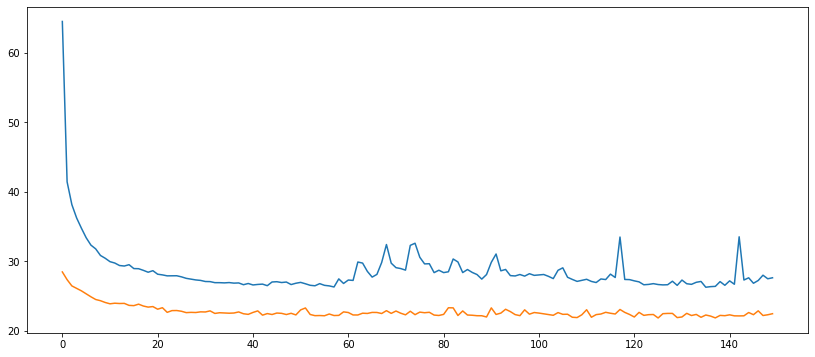

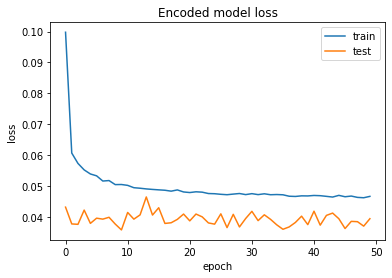

Overall accuracy of Convolutional Neural Network model: 0.9904496058706834


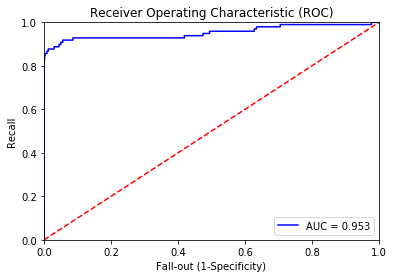

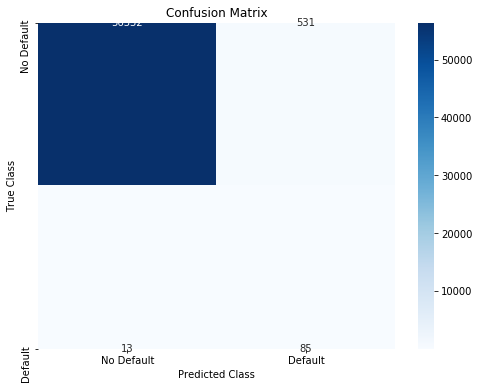

AUC(ROC): 0.9290043523872452
Precision: 0.137987012987013
Recall: 0.8673469387755102
F1 score: 0.23809523809523808
False positives: 531
True positives: 85
False negatives: 13
True negatives: 56332
Fold #4
Before OverSampling, counts of label '1': 492
Before OverSampling, counts of label '0': 284315 



F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
F:\Anaconda\lib\site-packages\sk

After OverSampling, the shape of train_X: (454904, 30)
After OverSampling, the shape of train_y: (454904,) 

After OverSampling, counts of label '1': 227452
After OverSampling, counts of label '0': 227452
Model: "model_7"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            (None, 30)           0                                            
__________________________________________________________________________________________________
dense_28 (Dense)                (None, 27)           837         input_7[0][0]                    
__________________________________________________________________________________________________
batch_normalization_34 (BatchNo (None, 27)           108         dense_28[0][0]                   
_____________________________________________________________________________________

454904/454904 [==============================] - 26s 57us/step - loss: 18.6683 - rec_loss: 30.4833 - kl_loss: 4.9085 - val_loss: 14.3181 - val_rec_loss: 25.0347 - val_kl_loss: 2.7640
Epoch 17/150
454904/454904 [==============================] - 26s 57us/step - loss: 18.6657 - rec_loss: 30.5142 - kl_loss: 4.9065 - val_loss: 14.3213 - val_rec_loss: 24.9313 - val_kl_loss: 2.8836
Epoch 18/150
454904/454904 [==============================] - 26s 57us/step - loss: 18.5735 - rec_loss: 30.3606 - kl_loss: 4.8973 - val_loss: 14.3107 - val_rec_loss: 24.9980 - val_kl_loss: 2.8117
Epoch 19/150
454904/454904 [==============================] - 26s 57us/step - loss: 18.5334 - rec_loss: 30.3148 - kl_loss: 4.8783 - val_loss: 14.3992 - val_rec_loss: 25.2104 - val_kl_loss: 2.7864
Epoch 20/150
454904/454904 [==============================] - 26s 57us/step - loss: 18.4308 - rec_loss: 30.1202 - kl_loss: 4.8756 - val_loss: 14.2195 - val_rec_loss: 24.6875 - val_kl_loss: 2.9510
Epoch 21/150
454904/454904 [=====

Epoch 58/150
454904/454904 [==============================] - 25s 56us/step - loss: 17.2609 - rec_loss: 27.8674 - kl_loss: 5.0214 - val_loss: 13.9696 - val_rec_loss: 24.3185 - val_kl_loss: 2.8924
Epoch 59/150
454904/454904 [==============================] - 26s 57us/step - loss: 17.2408 - rec_loss: 27.8411 - kl_loss: 5.0192 - val_loss: 14.1394 - val_rec_loss: 24.5833 - val_kl_loss: 2.9618
Epoch 60/150
454904/454904 [==============================] - 26s 56us/step - loss: 17.2041 - rec_loss: 27.7885 - kl_loss: 5.0115 - val_loss: 13.8605 - val_rec_loss: 24.1425 - val_kl_loss: 2.8618
Epoch 61/150
454904/454904 [==============================] - 26s 56us/step - loss: 17.2345 - rec_loss: 27.8271 - kl_loss: 5.0288 - val_loss: 14.1425 - val_rec_loss: 24.5936 - val_kl_loss: 2.9616
Epoch 62/150
454904/454904 [==============================] - 26s 56us/step - loss: 17.1286 - rec_loss: 27.6343 - kl_loss: 5.0224 - val_loss: 13.7551 - val_rec_loss: 23.9130 - val_kl_loss: 2.8811
Epoch 63/150
454904/

Epoch 100/150
454904/454904 [==============================] - 26s 57us/step - loss: 16.9613 - rec_loss: 27.2717 - kl_loss: 5.0839 - val_loss: 13.5290 - val_rec_loss: 23.5477 - val_kl_loss: 2.7957
Epoch 101/150
454904/454904 [==============================] - 26s 57us/step - loss: 17.0644 - rec_loss: 27.4832 - kl_loss: 5.0837 - val_loss: 13.7228 - val_rec_loss: 23.8192 - val_kl_loss: 2.9076
Epoch 102/150
454904/454904 [==============================] - 26s 57us/step - loss: 17.0026 - rec_loss: 27.3666 - kl_loss: 5.0833 - val_loss: 13.5550 - val_rec_loss: 23.4272 - val_kl_loss: 2.9572
Epoch 103/150
454904/454904 [==============================] - 26s 56us/step - loss: 16.9413 - rec_loss: 27.2557 - kl_loss: 5.0782 - val_loss: 13.6819 - val_rec_loss: 23.7275 - val_kl_loss: 2.9234
Epoch 104/150
454904/454904 [==============================] - 26s 56us/step - loss: 16.9473 - rec_loss: 27.2704 - kl_loss: 5.0700 - val_loss: 13.6628 - val_rec_loss: 23.7602 - val_kl_loss: 2.8341
Epoch 105/150
4

454904/454904 [==============================] - 25s 54us/step - loss: 16.7445 - rec_loss: 26.8805 - kl_loss: 5.0971 - val_loss: 13.5883 - val_rec_loss: 23.4643 - val_kl_loss: 2.9940
Epoch 142/150
454904/454904 [==============================] - 26s 57us/step - loss: 16.7923 - rec_loss: 26.9789 - kl_loss: 5.0937 - val_loss: 13.3975 - val_rec_loss: 23.1680 - val_kl_loss: 2.9045
Epoch 143/150
454904/454904 [==============================] - 26s 57us/step - loss: 16.7214 - rec_loss: 26.8383 - kl_loss: 5.0995 - val_loss: 13.4194 - val_rec_loss: 23.1489 - val_kl_loss: 2.9816
Epoch 144/150
454904/454904 [==============================] - 26s 57us/step - loss: 16.7090 - rec_loss: 26.8052 - kl_loss: 5.1022 - val_loss: 13.4696 - val_rec_loss: 23.3542 - val_kl_loss: 2.8732
Epoch 145/150
454904/454904 [==============================] - 26s 57us/step - loss: 16.7265 - rec_loss: 26.8558 - kl_loss: 5.0966 - val_loss: 13.4826 - val_rec_loss: 23.3868 - val_kl_loss: 2.8677
Epoch 146/150
454904/454904 [

454904/454904 [==============================] - 97s 213us/step - loss: 0.0406 - accuracy: 0.9859 - val_loss: 0.0396 - val_accuracy: 0.9862
Epoch 42/50
454904/454904 [==============================] - 95s 209us/step - loss: 0.0408 - accuracy: 0.9859 - val_loss: 0.0372 - val_accuracy: 0.9862
Epoch 43/50
454904/454904 [==============================] - 96s 212us/step - loss: 0.0407 - accuracy: 0.9858 - val_loss: 0.0435 - val_accuracy: 0.9850
Epoch 44/50
454904/454904 [==============================] - 97s 213us/step - loss: 0.0407 - accuracy: 0.9859 - val_loss: 0.0404 - val_accuracy: 0.9855
Epoch 45/50
454904/454904 [==============================] - 97s 213us/step - loss: 0.0405 - accuracy: 0.9859 - val_loss: 0.0418 - val_accuracy: 0.9854
Epoch 46/50
454904/454904 [==============================] - 96s 212us/step - loss: 0.0404 - accuracy: 0.9860 - val_loss: 0.0414 - val_accuracy: 0.9851
Epoch 47/50
454904/454904 [==============================] - 96s 212us/step - loss: 0.0405 - accurac

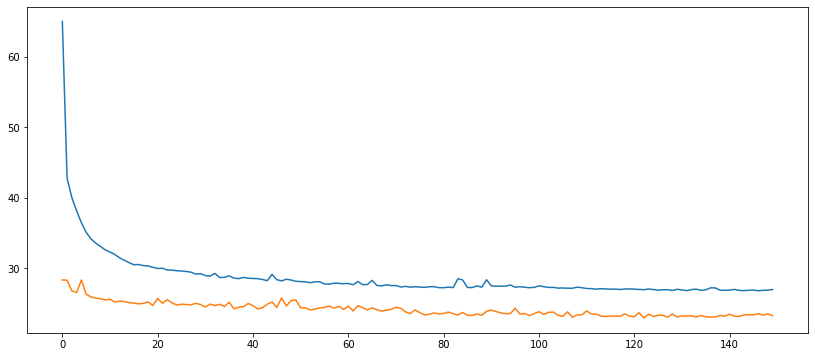

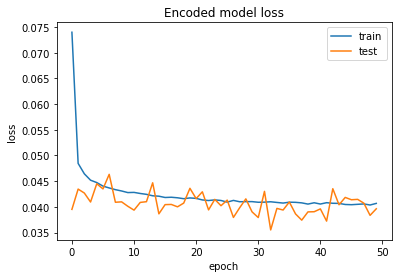

Overall accuracy of Convolutional Neural Network model: 0.9854286266041677


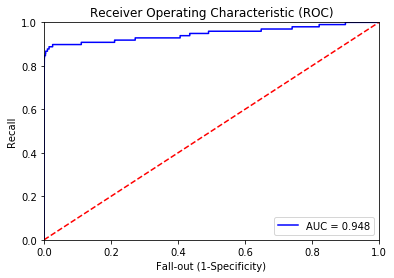

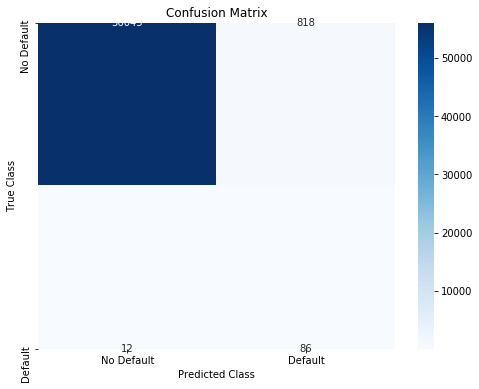

AUC(ROC): 0.9315827838266482
Precision: 0.09513274336283185
Recall: 0.8775510204081632
F1 score: 0.17165668662674652
False positives: 818
True positives: 86
False negatives: 12
True negatives: 56045
Fold #5
Before OverSampling, counts of label '1': 492
Before OverSampling, counts of label '0': 284315 



F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
F:\Anaconda\lib\site-packages\sk

After OverSampling, the shape of train_X: (454904, 30)
After OverSampling, the shape of train_y: (454904,) 

After OverSampling, counts of label '1': 227452
After OverSampling, counts of label '0': 227452
Model: "model_9"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_9 (InputLayer)            (None, 30)           0                                            
__________________________________________________________________________________________________
dense_37 (Dense)                (None, 27)           837         input_9[0][0]                    
__________________________________________________________________________________________________
batch_normalization_45 (BatchNo (None, 27)           108         dense_37[0][0]                   
_____________________________________________________________________________________

454904/454904 [==============================] - 26s 57us/step - loss: 17.6906 - rec_loss: 28.9751 - kl_loss: 4.7222 - val_loss: 13.9381 - val_rec_loss: 24.1634 - val_kl_loss: 3.0022
Epoch 17/150
454904/454904 [==============================] - 26s 57us/step - loss: 17.5219 - rec_loss: 28.6338 - kl_loss: 4.7366 - val_loss: 13.8026 - val_rec_loss: 23.9764 - val_kl_loss: 2.9240
Epoch 18/150
454904/454904 [==============================] - 26s 57us/step - loss: 17.4583 - rec_loss: 28.5146 - kl_loss: 4.7440 - val_loss: 13.8512 - val_rec_loss: 24.0132 - val_kl_loss: 2.9902
Epoch 19/150
454904/454904 [==============================] - 26s 57us/step - loss: 17.5025 - rec_loss: 28.6177 - kl_loss: 4.7466 - val_loss: 14.1828 - val_rec_loss: 24.6963 - val_kl_loss: 2.9883
Epoch 20/150
454904/454904 [==============================] - 26s 57us/step - loss: 17.3075 - rec_loss: 28.2572 - kl_loss: 4.7441 - val_loss: 13.7708 - val_rec_loss: 23.8081 - val_kl_loss: 3.0418
Epoch 21/150
454904/454904 [=====

Epoch 58/150
454904/454904 [==============================] - 26s 57us/step - loss: 16.3866 - rec_loss: 26.4533 - kl_loss: 4.8975 - val_loss: 14.0707 - val_rec_loss: 24.3111 - val_kl_loss: 3.2204
Epoch 59/150
454904/454904 [==============================] - 26s 57us/step - loss: 16.3379 - rec_loss: 26.3647 - kl_loss: 4.9068 - val_loss: 13.3331 - val_rec_loss: 22.9152 - val_kl_loss: 3.1459
Epoch 60/150
454904/454904 [==============================] - 26s 57us/step - loss: 16.5240 - rec_loss: 26.7387 - kl_loss: 4.9041 - val_loss: 13.4464 - val_rec_loss: 23.1739 - val_kl_loss: 3.1045
Epoch 61/150
454904/454904 [==============================] - 26s 57us/step - loss: 16.3354 - rec_loss: 26.3662 - kl_loss: 4.9061 - val_loss: 13.5481 - val_rec_loss: 23.2935 - val_kl_loss: 3.1966
Epoch 62/150
454904/454904 [==============================] - 26s 57us/step - loss: 16.2717 - rec_loss: 26.2347 - kl_loss: 4.9120 - val_loss: 13.4088 - val_rec_loss: 23.1119 - val_kl_loss: 3.1138
Epoch 63/150
454904/

Epoch 100/150
454904/454904 [==============================] - 26s 57us/step - loss: 16.0299 - rec_loss: 25.7446 - kl_loss: 4.9091 - val_loss: 13.7418 - val_rec_loss: 23.6302 - val_kl_loss: 3.2435
Epoch 101/150
454904/454904 [==============================] - 26s 57us/step - loss: 16.0432 - rec_loss: 25.7592 - kl_loss: 4.9187 - val_loss: 13.4042 - val_rec_loss: 23.0652 - val_kl_loss: 3.1265
Epoch 102/150
454904/454904 [==============================] - 26s 57us/step - loss: 16.0058 - rec_loss: 25.6799 - kl_loss: 4.9239 - val_loss: 13.4266 - val_rec_loss: 22.9595 - val_kl_loss: 3.2685
Epoch 103/150
454904/454904 [==============================] - 26s 57us/step - loss: 16.0177 - rec_loss: 25.7088 - kl_loss: 4.9182 - val_loss: 13.4198 - val_rec_loss: 22.9102 - val_kl_loss: 3.3220
Epoch 104/150
454904/454904 [==============================] - 26s 57us/step - loss: 16.0195 - rec_loss: 25.7078 - kl_loss: 4.9271 - val_loss: 13.7854 - val_rec_loss: 24.0022 - val_kl_loss: 2.9467
Epoch 105/150
4

454904/454904 [==============================] - 26s 57us/step - loss: 16.1374 - rec_loss: 25.9290 - kl_loss: 4.9343 - val_loss: 13.6012 - val_rec_loss: 23.4028 - val_kl_loss: 3.1984
Epoch 142/150
454904/454904 [==============================] - 26s 57us/step - loss: 16.1286 - rec_loss: 25.9134 - kl_loss: 4.9338 - val_loss: 13.6874 - val_rec_loss: 23.5016 - val_kl_loss: 3.2623
Epoch 143/150
454904/454904 [==============================] - 26s 57us/step - loss: 15.9120 - rec_loss: 25.5000 - kl_loss: 4.9286 - val_loss: 13.5441 - val_rec_loss: 23.3655 - val_kl_loss: 3.1153
Epoch 144/150
454904/454904 [==============================] - 26s 58us/step - loss: 15.8827 - rec_loss: 25.4246 - kl_loss: 4.9398 - val_loss: 13.5588 - val_rec_loss: 23.2447 - val_kl_loss: 3.2760
Epoch 145/150
454904/454904 [==============================] - 26s 56us/step - loss: 15.9232 - rec_loss: 25.5117 - kl_loss: 4.9416 - val_loss: 13.6049 - val_rec_loss: 23.3652 - val_kl_loss: 3.2490
Epoch 146/150
454904/454904 [

454904/454904 [==============================] - 98s 216us/step - loss: 0.0474 - accuracy: 0.9842 - val_loss: 0.0506 - val_accuracy: 0.9852
Epoch 42/50
454904/454904 [==============================] - 98s 216us/step - loss: 0.0474 - accuracy: 0.9842 - val_loss: 0.0483 - val_accuracy: 0.9866
Epoch 43/50
454904/454904 [==============================] - 98s 216us/step - loss: 0.0476 - accuracy: 0.9843 - val_loss: 0.0463 - val_accuracy: 0.9865
Epoch 44/50
454904/454904 [==============================] - 98s 215us/step - loss: 0.0475 - accuracy: 0.9844 - val_loss: 0.0476 - val_accuracy: 0.9859
Epoch 45/50
454904/454904 [==============================] - 98s 215us/step - loss: 0.0474 - accuracy: 0.9843 - val_loss: 0.0428 - val_accuracy: 0.9871
Epoch 46/50
454904/454904 [==============================] - 98s 215us/step - loss: 0.0476 - accuracy: 0.9842 - val_loss: 0.0470 - val_accuracy: 0.9856
Epoch 47/50
454904/454904 [==============================] - 98s 215us/step - loss: 0.0473 - accurac

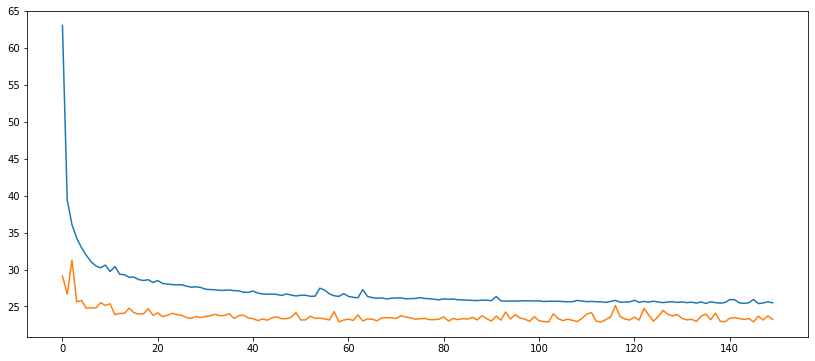

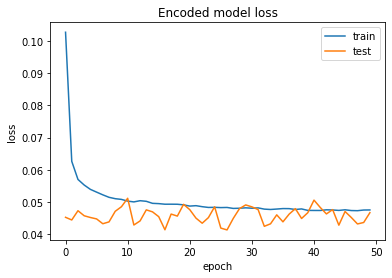

Overall accuracy of Convolutional Neural Network model: 0.9857621881638314


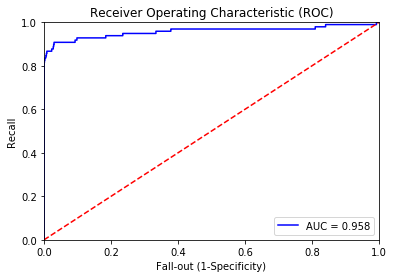

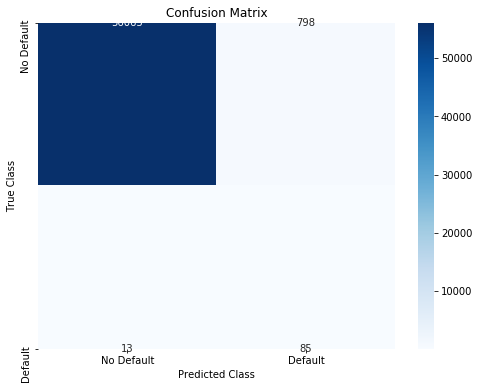

AUC(ROC): 0.9266566042909434
Precision: 0.09626274065685164
Recall: 0.8673469387755102
F1 score: 0.1732925586136595
False positives: 798
True positives: 85
False negatives: 13
True negatives: 56065


In [6]:
encoding_dim_1 = 27
encoding_dim_2 = 24
encoding_dim_3 = 21
#encoding_dim_4 = 20
#encoding_dim_5 = 18
hidden_dim = 15 #size of the hidden layer in encoder and decoder
latent_dim = 2 #number of latent variables to learn
learning_rate = 1e-3

#Cross_Validate

kf = StratifiedKFold(5, shuffle = True, random_state=42) # Use for Kfold Validation

tn_summary=[]
fp_summary=[]
fn_summary=[]
tp_summary=[]

def Average(lst): 
    return sum(lst) / len(lst)
    

fold = 0

for train, test in kf.split(X,y):
    fold +=1
    print(f"Fold #{fold}")
    
    
    
    x_train = X[train]
    y_train = y[train]
    x_test = X[test]
    y_test = y[test]

    
    scaler = preprocessing.StandardScaler()

    x_train, x_test = scaler.fit_transform(x_train), scaler.fit_transform(x_test) 
    
    
    print("Before OverSampling, counts of label '1': {}".format(sum(y==1)))
    print("Before OverSampling, counts of label '0': {} \n".format(sum(y==0)))

    sm = SVMSMOTE(random_state=2)
    X_res_train, y_train_res = sm.fit_sample(x_train, y_train.ravel())

    print('After OverSampling, the shape of train_X: {}'.format(X_res_train.shape))
    print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

    print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
    print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))
    
    

    input_dim = X_res_train.shape[1]
    x = input_dim

    input_layer = Input(shape=(input_dim,))

    encoder = Dense(encoding_dim_1, activation='tanh',activity_regularizer=regularizers.l1(learning_rate))(input_layer)
    encoder = BatchNormalization()(encoder)

    encoder = Dense(encoding_dim_2, activation='tanh')(encoder)
    encoder = BatchNormalization()(encoder)

    encoder = Dense(encoding_dim_3, activation='tanh')(encoder)
    encoder = BatchNormalization()(encoder)

    #encoder = Dense (encoding_dim_4, activation = 'tanh')(encoder)
    #encoder = BatchNormalization()(encoder)

    #encoder = Dense (encoding_dim_5, activation = 'tanh')(encoder)
    #encoder = BatchNormalization()(encoder)

    encoder = Dense(hidden_dim, activation='tanh' , name='encoder_hidden')(encoder)
    encoder = BatchNormalization()(encoder)

    z_mean = Dense(latent_dim, name='z_mean')(encoder)
    z_log_var = Dense(latent_dim, name='z_log_var')(encoder)
    
    def sampling(args):
        z_mean, z_log_var = args
        epsilon = K.random_normal(shape=K.shape(z_mean), mean=0., stddev=1.)
        return z_mean + K.exp(z_log_var / 2) * epsilon

    z = Lambda(sampling, name='z_sampled')([z_mean, z_log_var])
    t = BatchNormalization()(z)

    decoder1 = Dense(hidden_dim, activation='tanh')(t)
    decoder1 = BatchNormalization()(decoder1) 

    #decoder = Dense(encoding_dim_5, activation = 'tanh')(decoder)
    #decoder = BatchNormalization()(decoder)

    #decoder = Dense(encoding_dim_4, activation = 'tanh')(decoder)
    #decoder = BatchNormalization()(decoder)

    decoder = Dense(encoding_dim_3, activation='tanh')(decoder1)
    decoder = BatchNormalization()(decoder)

    decoder = Dense(encoding_dim_2, activation='tanh')(decoder)
    decoder = BatchNormalization()(decoder)

    decoder = Dense(encoding_dim_1, activation='tanh')(decoder)
    decoder = BatchNormalization()(decoder)


    decoded_mean = Dense(input_dim, activation=None, name='decoded_mean')(decoder)


    vae = Model(inputs=input_layer, outputs=decoded_mean)
    
    def rec_loss(y_true, y_pred):
        return K.sum(K.square(y_true - y_pred), axis=-1)

    def kl_loss(y_true, y_pred):
        return - 0.5 * K.sum(1 + z_log_var - K.square(z_mean) - K.exp(z_log_var), axis=-1)

    def vae_loss(x, decoded_mean):
        rec_loss = K.sum(K.square(x - decoded_mean), axis=-1)
        kl_loss = - 0.5 * K.sum(1 + z_log_var - K.square(z_mean) - K.exp(z_log_var), axis=-1)
        return K.mean((rec_loss + kl_loss) / 2)

    vae.compile(optimizer=RMSprop(lr=learning_rate), loss=vae_loss, metrics=[rec_loss, kl_loss])
    vae.summary()
    
    n_epochs = 150
    batch_size = 128

#early_stopping = EarlyStopping(monitor='loss', patience=10, min_delta=1e-5) #stop training if loss does not decrease with at least 0.00001
#reduce_lr = ReduceLROnPlateau(monitor='loss', patience=5, min_delta=1e-5, factor=0.2) #reduce learning rate (divide it by 5 = multiply it by 0.2) if loss does not decrease with at least 0.00001

#callbacks = [reduce_lr]

#collect training data in history object
    history = vae.fit(X_res_train, X_res_train, 
                  validation_data=(x_test, x_test),
                  batch_size=batch_size,
                  shuffle = True,
                  epochs=n_epochs,
                  )
    
    
    fig = plt.figure(figsize=(14, 6))
    ax = fig.gca()
    ax.plot(history.history['rec_loss']);
    ax.plot(history.history['val_rec_loss']);
    
    
    
    # Create a separate model (encoder) in order to make encodings (first part of the autoencoder model)
    encoder_model = Model(input_layer, decoder1)
    # Create a placeholder for an encoded input
    encoded_input = Input(shape=(hidden_dim,))
    
    
    #Encode data set from above using the encoder
    encoded_train_x = encoder_model.predict(X_res_train)
    encoded_test_x = encoder_model.predict(x_test)
    #Reshape data for the CNN model
    encoded_train_x = encoded_train_x.reshape(encoded_train_x.shape[0],encoded_train_x.shape[1], 1)
    encoded_test_x = encoded_test_x.reshape(encoded_test_x.shape[0], encoded_test_x.shape[1], 1)
    encoded_train_x.shape
    
    #--------------------------------Build new model using encoded data--------------------------

    model = Sequential()
    model.add(Conv1D(32, 2, activation='relu', input_shape = encoded_train_x[1].shape))
    model.add(BatchNormalization())
    model.add(MaxPool1D(2))
    model.add(Dropout(0.2))

    model.add(Conv1D(64, 2, activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPool1D(2))
    model.add(Dropout(0.5))

    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.5))

    model.add(Dense(1, activation='sigmoid'))

    model.compile(optimizer=Adam(lr=0.0001), loss = 'binary_crossentropy',metrics=['accuracy'])
    history = model.fit(encoded_train_x, y_train_res, epochs=50,validation_data=(encoded_test_x, y_test), verbose=1)

    # Summarize history for loss
    plt.figure()
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Encoded model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper right')
    plt.show()
    
    

        #---------------------------------Predictions and visuallizations-----------------------#Predict on test set
    predictions_CNN_prob = model.predict(encoded_test_x)
    predictions_CNN_prob = predictions_CNN_prob[:,0]
    predictions_CNN_01 = np.where(predictions_CNN_prob > 0.5, 1, 0) #Turn probability to 0-1 binary output
    #Print accuracy
    acc_CNN = accuracy_score(y_test, predictions_CNN_01)
    print('Overall accuracy of Convolutional Neural Network model:', acc_CNN)
    #Print Area Under Curve
    false_positive_rate, recall, thresholds = roc_curve(y_test,predictions_CNN_prob)
    roc_auc = auc(false_positive_rate, recall)
    plt.figure()
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.plot(false_positive_rate, recall, 'b', label = 'AUC = %0.3f' %roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0,1], [0,1], 'r--')
    plt.xlim([0.0,1.0])
    plt.ylim([0.0,1.0])
    plt.ylabel('Recall')
    plt.xlabel('Fall-out (1-Specificity)')
    plt.show()
    #Print Confusion Matrix
    cm = confusion_matrix(y_test, predictions_CNN_01)
    labels = ['No Default', 'Default']
    plt.figure(figsize=(8,6))
    sns.heatmap(cm,xticklabels=labels, yticklabels=labels, annot=True, fmt='d',cmap="Blues", vmin = 0.2);
    plt.title('Confusion Matrix')
    plt.ylabel('True Class')
    plt.xlabel('Predicted Class')
    plt.show()


    print("AUC(ROC): " + str(metrics.roc_auc_score(y_test, predictions_CNN_01)))
    print("Precision: " + str(metrics.precision_score(y_test, predictions_CNN_01)))
    print("Recall: " + str(metrics.recall_score(y_test, predictions_CNN_01)))
    print("F1 score: " + str(metrics.f1_score(y_test, predictions_CNN_01)))

    tn, fp, fn, tp = metrics.confusion_matrix(y_test, predictions_CNN_01).ravel()

    print("False positives: " + str(fp))
    print("True positives: " + str(tp))
    print("False negatives: " + str(fn))
    print("True negatives: " + str(tn))
    

    tn_summary.append(tn)
    fp_summary.append(fp)
    fn_summary.append(fn)
    tp_summary.append(tp)
    

      

In [7]:

print("Average tn = " + str(Average(tn_summary)))
print("Average fp = " + str(Average(fp_summary)))
print("Average fn = "+ str(Average(fn_summary)))    
print("Average tp = "+ str(Average(tp_summary)))   


Average_precision = Average(tp_summary)/(Average(tp_summary)+Average(fp_summary))
Average_recall = Average(tp_summary)/(Average(tp_summary)+Average(fn_summary))
Average_f1_score = 2*Average_precision*Average_recall/(Average_precision + Average_recall)

print("Average Precision = {:0.2f}%".format(Average_precision*100))

print("Average Recall = {:0.2f}%".format(Average_recall*100))

print("Average F1 score = {:0.2f}%".format(Average_f1_score*100))

Average tn = 56107.4
Average fp = 755.6
Average fn = 12.8
Average tp = 85.6
Average Precision = 10.18%
Average Recall = 86.99%
Average F1 score = 18.22%


In [8]:
total_tn=0
total_fp=0
total_fn=0
total_tp=0

for i in tn_summary:
    total_tn = total_tn + i

for j in fp_summary:
    total_fp = total_fp + j
    
for x in fn_summary:
    total_fn = total_fn + x
    
for y in tp_summary:
    total_tp = total_tp + y

print(" Total tn: " + str(total_tn))
print("Total fp: " + str(total_fp))
print(" Total fn:" + str(total_fn))
print(" Total tp:" + str(total_tp))


Total_Precision = total_tp/(total_tp + total_fp)
Total_Recall = total_tp/(total_tp+ total_fn)

Total_F1_score = 2*Total_Precision*Total_Recall/(Total_Precision + Total_Recall)

print("Total Precision = " + str(Total_Precision))
print("Total Recall = " + str(Total_Recall))
print("Total F1_score = " + str(Total_F1_score))
    


 Total tn: 280537
Total fp: 3778
 Total fn:64
 Total tp:428
Total Precision = 0.10175939134569663
Total Recall = 0.8699186991869918
Total F1_score = 0.18220519369944657
